In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

import seaborn as sns

Using TensorFlow backend.


In [57]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
df[['BMI', 'BloodPressure', 'Glucose']] = df[['BMI', 'BloodPressure', 'Glucose']].replace(0, np.NaN)
df.fillna(df.mean(), inplace=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,0,33.600000,0.627,50,1
1,1,85.0,66.000000,29,0,26.600000,0.351,31,0
2,8,183.0,64.000000,0,0,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94,28.100000,0.167,21,0
4,0,137.0,40.000000,35,168,43.100000,2.288,33,1
5,5,116.0,74.000000,0,0,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88,31.000000,0.248,26,1
7,10,115.0,72.405184,0,0,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543,30.500000,0.158,53,1
9,8,125.0,96.000000,0,0,32.457464,0.232,54,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f293d791b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f293d43b080>]], dtype=object)

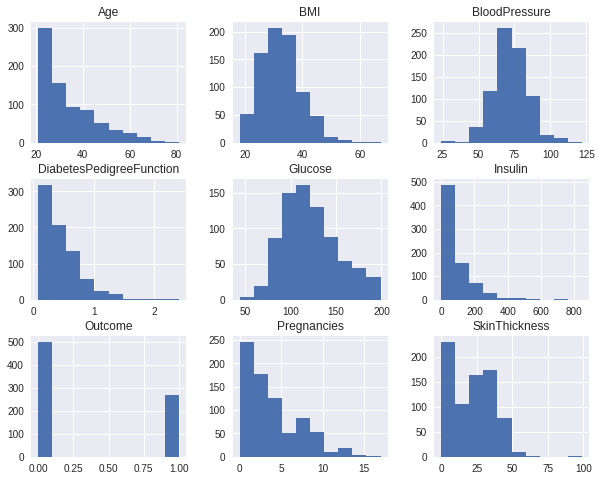

In [60]:
df.hist(figsize=(10,8))

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

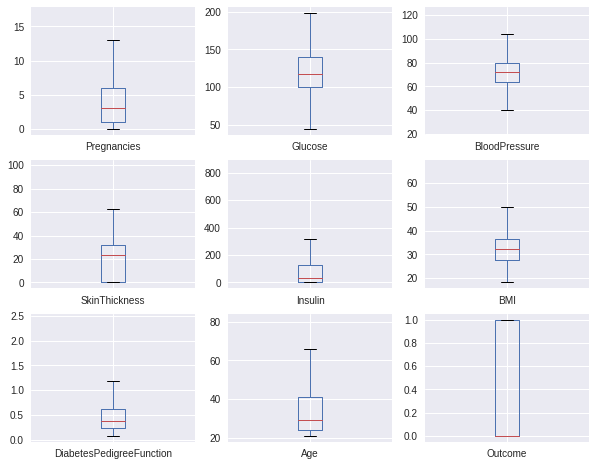

In [61]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [62]:
X = df.drop(['Outcome', 'SkinThickness', 'DiabetesPedigreeFunction' ], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age
0,6,148.0,72.0,0,33.6,50
1,1,85.0,66.0,0,26.6,31
2,8,183.0,64.0,0,23.3,32
3,1,89.0,66.0,94,28.1,21
4,0,137.0,40.0,168,43.1,33


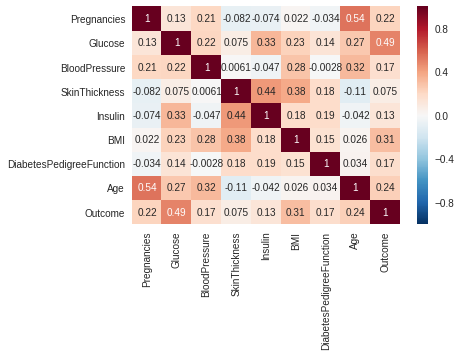

In [63]:
corr = df[df.columns].corr()
sns.heatmap(corr, annot = True)

In [64]:
y= df['Outcome']
y_cat = to_categorical(y)
y_cat[:10]

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [65]:
Xn = normalize(X, norm='l1', axis=0)
Xn[:5]

array([[ 0.00203183,  0.00158364,  0.0012948 ,  0.        ,  0.00134792,
         0.00195856],
       [ 0.00033864,  0.00090952,  0.0011869 ,  0.        ,  0.0010671 ,
         0.00121431],
       [ 0.00270911,  0.00195815,  0.00115093,  0.        ,  0.00093472,
         0.00125348],
       [ 0.00033864,  0.00095233,  0.0011869 ,  0.00153379,  0.00112728,
         0.00082259],
       [ 0.        ,  0.00146594,  0.00071933,  0.00274125,  0.00172903,
         0.00129265]])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y_cat,test_size=0.2, random_state=22)

In [67]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='softmax'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.03), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
614/614 [==============================] - 0s 218us/step - loss: 0.6537 - acc: 0.6450
Epoch 2/1000
614/614 [==============================] - 0s 39us/step - loss: 0.6524 - acc: 0.6515
Epoch 3/1000
614/614 [==============================] - 0s 48us/step - loss: 0.6475 - acc: 0.6515
Epoch 4/1000
614/614 [==============================] - 0s 39us/step - loss: 0.6481 - acc: 0.6515
Epoch 5/1000
614/614 [==============================] - 0s 44us/step - loss: 0.6495 - acc: 0.6515
Epoch 6/1000
614/614 [==============================] - 0s 39us/step - loss: 0.6473 - acc: 0.6515
Epoch 7/1000
614/614 [==============================] - 0s 40us/step - loss: 0.6469 - acc: 0.6515
Epoch 8/1000
614/614 [==============================] - 0s 40us/step - loss: 0.6477 - acc: 0.6515
Epoch 9/1000
614/614 [==============================] - 0s 40us/step - loss: 0.6465 - acc: 0.6515
Epoch 10/1000
614/614 [==============================] - 0s 46us/step - loss: 0.6470 - acc: 0.6515
Epoch 11/1000
614/

614/614 [==============================] - 0s 39us/step - loss: 0.5934 - acc: 0.6971
Epoch 84/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5908 - acc: 0.6906
Epoch 85/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5958 - acc: 0.6792
Epoch 86/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5918 - acc: 0.7052
Epoch 87/1000
614/614 [==============================] - 0s 38us/step - loss: 0.5926 - acc: 0.6808
Epoch 88/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5897 - acc: 0.7036
Epoch 89/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5933 - acc: 0.6922
Epoch 90/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5968 - acc: 0.6857
Epoch 91/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5932 - acc: 0.7020
Epoch 92/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5957 - acc: 0.6873
Epoch 93/1000
614/614 [=

614/614 [==============================] - 0s 39us/step - loss: 0.5677 - acc: 0.7020
Epoch 166/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5684 - acc: 0.7036
Epoch 167/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5585 - acc: 0.7199
Epoch 168/1000
614/614 [==============================] - 0s 38us/step - loss: 0.5590 - acc: 0.7036
Epoch 169/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5613 - acc: 0.7003
Epoch 170/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5643 - acc: 0.7085
Epoch 171/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5561 - acc: 0.7036
Epoch 172/1000
614/614 [==============================] - 0s 49us/step - loss: 0.5559 - acc: 0.7052
Epoch 173/1000
614/614 [==============================] - 0s 50us/step - loss: 0.5605 - acc: 0.7036
Epoch 174/1000
614/614 [==============================] - 0s 45us/step - loss: 0.5554 - acc: 0.7117
Epoch 175/1000


614/614 [==============================] - 0s 40us/step - loss: 0.5384 - acc: 0.7085
Epoch 248/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5559 - acc: 0.7052
Epoch 249/1000
614/614 [==============================] - 0s 37us/step - loss: 0.5416 - acc: 0.7117
Epoch 250/1000
614/614 [==============================] - 0s 35us/step - loss: 0.5468 - acc: 0.6971
Epoch 251/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5453 - acc: 0.7199
Epoch 252/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5487 - acc: 0.7068
Epoch 253/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5404 - acc: 0.7068
Epoch 254/1000
614/614 [==============================] - 0s 37us/step - loss: 0.5567 - acc: 0.6922
Epoch 255/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5386 - acc: 0.7166
Epoch 256/1000
614/614 [==============================] - 0s 38us/step - loss: 0.5368 - acc: 0.7150
Epoch 257/1000


614/614 [==============================] - 0s 38us/step - loss: 0.5250 - acc: 0.7215
Epoch 330/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5348 - acc: 0.7215
Epoch 331/1000
614/614 [==============================] - 0s 43us/step - loss: 0.5229 - acc: 0.7508
Epoch 332/1000
614/614 [==============================] - 0s 38us/step - loss: 0.5189 - acc: 0.7231
Epoch 333/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5162 - acc: 0.7264
Epoch 334/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5265 - acc: 0.7345
Epoch 335/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5184 - acc: 0.7362
Epoch 336/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5172 - acc: 0.7296
Epoch 337/1000
614/614 [==============================] - 0s 39us/step - loss: 0.5271 - acc: 0.7296
Epoch 338/1000
614/614 [==============================] - 0s 49us/step - loss: 0.5216 - acc: 0.7215
Epoch 339/1000


614/614 [==============================] - 0s 38us/step - loss: 0.5047 - acc: 0.7508
Epoch 412/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5061 - acc: 0.7329
Epoch 413/1000
614/614 [==============================] - 0s 37us/step - loss: 0.5303 - acc: 0.7215
Epoch 414/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5173 - acc: 0.7492
Epoch 415/1000
614/614 [==============================] - 0s 42us/step - loss: 0.5081 - acc: 0.7573
Epoch 416/1000
614/614 [==============================] - 0s 40us/step - loss: 0.5009 - acc: 0.7638
Epoch 417/1000
614/614 [==============================] - 0s 35us/step - loss: 0.5015 - acc: 0.7622
Epoch 418/1000
614/614 [==============================] - 0s 37us/step - loss: 0.4972 - acc: 0.7362
Epoch 419/1000
614/614 [==============================] - 0s 35us/step - loss: 0.5054 - acc: 0.7524
Epoch 420/1000
614/614 [==============================] - 0s 36us/step - loss: 0.5029 - acc: 0.7394
Epoch 421/1000


614/614 [==============================] - 0s 37us/step - loss: 0.4962 - acc: 0.7476
Epoch 494/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5023 - acc: 0.7476
Epoch 495/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4960 - acc: 0.7590
Epoch 496/1000
614/614 [==============================] - 0s 49us/step - loss: 0.4916 - acc: 0.7638
Epoch 497/1000
614/614 [==============================] - 0s 35us/step - loss: 0.4891 - acc: 0.7622
Epoch 498/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4932 - acc: 0.7557
Epoch 499/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5011 - acc: 0.7394
Epoch 500/1000
614/614 [==============================] - 0s 48us/step - loss: 0.4936 - acc: 0.7573
Epoch 501/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4907 - acc: 0.7557
Epoch 502/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5027 - acc: 0.7524
Epoch 503/1000


614/614 [==============================] - 0s 40us/step - loss: 0.4778 - acc: 0.7720
Epoch 576/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4803 - acc: 0.7671
Epoch 577/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4809 - acc: 0.7671
Epoch 578/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4840 - acc: 0.7606
Epoch 579/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4901 - acc: 0.7573
Epoch 580/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4968 - acc: 0.7378
Epoch 581/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4837 - acc: 0.7606
Epoch 582/1000
614/614 [==============================] - 0s 38us/step - loss: 0.5005 - acc: 0.7394
Epoch 583/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4869 - acc: 0.7492
Epoch 584/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4841 - acc: 0.7655
Epoch 585/1000


614/614 [==============================] - 0s 40us/step - loss: 0.4721 - acc: 0.7671
Epoch 658/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4806 - acc: 0.7687
Epoch 659/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4776 - acc: 0.7573
Epoch 660/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4985 - acc: 0.7769
Epoch 661/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4885 - acc: 0.7638
Epoch 662/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4872 - acc: 0.7524
Epoch 663/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4814 - acc: 0.7573
Epoch 664/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4794 - acc: 0.7687
Epoch 665/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4797 - acc: 0.7687
Epoch 666/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4794 - acc: 0.7671
Epoch 667/1000


614/614 [==============================] - 0s 39us/step - loss: 0.4781 - acc: 0.7736
Epoch 740/1000
614/614 [==============================] - 0s 36us/step - loss: 0.4801 - acc: 0.7590
Epoch 741/1000
614/614 [==============================] - 0s 37us/step - loss: 0.4824 - acc: 0.7541
Epoch 742/1000
614/614 [==============================] - 0s 36us/step - loss: 0.4779 - acc: 0.7655
Epoch 743/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4740 - acc: 0.7704
Epoch 744/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4953 - acc: 0.7590
Epoch 745/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4684 - acc: 0.7769
Epoch 746/1000
614/614 [==============================] - 0s 52us/step - loss: 0.4719 - acc: 0.7671
Epoch 747/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4970 - acc: 0.7687
Epoch 748/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4792 - acc: 0.7687
Epoch 749/1000


614/614 [==============================] - 0s 45us/step - loss: 0.4744 - acc: 0.7736
Epoch 822/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4696 - acc: 0.7687
Epoch 823/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4724 - acc: 0.7801
Epoch 824/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4972 - acc: 0.7443
Epoch 825/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4727 - acc: 0.7704
Epoch 826/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4722 - acc: 0.7671
Epoch 827/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4686 - acc: 0.7671
Epoch 828/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4812 - acc: 0.7736
Epoch 829/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4736 - acc: 0.7720
Epoch 830/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4939 - acc: 0.7541
Epoch 831/1000


614/614 [==============================] - 0s 42us/step - loss: 0.4733 - acc: 0.7687
Epoch 904/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4700 - acc: 0.7704
Epoch 905/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4738 - acc: 0.7736
Epoch 906/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4721 - acc: 0.7671
Epoch 907/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4860 - acc: 0.7606
Epoch 908/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4777 - acc: 0.7866
Epoch 909/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4933 - acc: 0.7476
Epoch 910/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4706 - acc: 0.7671
Epoch 911/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4677 - acc: 0.7801
Epoch 912/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5073 - acc: 0.7671
Epoch 913/1000


614/614 [==============================] - 0s 45us/step - loss: 0.4641 - acc: 0.7801
Epoch 986/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4687 - acc: 0.7704
Epoch 987/1000
614/614 [==============================] - 0s 37us/step - loss: 0.4662 - acc: 0.7720
Epoch 988/1000
614/614 [==============================] - 0s 36us/step - loss: 0.4768 - acc: 0.7785
Epoch 989/1000
614/614 [==============================] - 0s 34us/step - loss: 0.4689 - acc: 0.7769
Epoch 990/1000
614/614 [==============================] - 0s 53us/step - loss: 0.4677 - acc: 0.7752
Epoch 991/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4671 - acc: 0.7736
Epoch 992/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - acc: 0.7720
Epoch 993/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4744 - acc: 0.7655
Epoch 994/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4760 - acc: 0.7687
Epoch 995/1000


In [68]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [69]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       0.75      0.87      0.81       100
          1       0.66      0.46      0.54        54

avg / total       0.72      0.73      0.71       154



In [70]:
cm = confusion_matrix(y_test_class, y_pred_class)
pd.DataFrame(cm)

,0,1
0,87,13
1,29,25


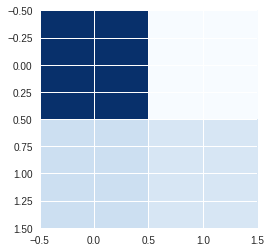

In [71]:
plt.imshow(cm, cmap='Blues')